$$\text{Feature Selection}$$

#### What is Feature Seleciton?
___

**特征选择**是一种筛选掉对于模型来说无用的特征以减少模型复杂度和计算量的方法，最终的目标是获得一个计算简便不会影响预测精确度的模型。

特征选择总体上可以被划分成三个类型：*Filtering, Wrapper, and Embedded.*

接下来，逐一介绍这三种特征选择方法。

#### Filtering
___

**What is Filtering Method?**

Filtering会对特征进行预处理，筛选掉对于模型可能没有用出的特征。例如计算特征与目标变量的相关系数，然后过滤掉低于目标阀值的特征。Filtering优点是容易实现且计算量少，但是*filtering*在进行特征选择时没有考虑到具体使用的模型。因此，特征选择很容易过滤掉一些在建模前看起来用处不大，但是对于某种模型有用的特征。

**When to use filtering?**

因为Filtering容易实现但是没有考虑到具体模型的特点，Filtering比较适合在对数据预处理的时候进行保守式的特征过滤，以防止移除了可能对于模型有用的特征。

**What Filtering techniques are available?**

对于特征变量类型的不同，我们采取不同的过滤方法。主要包括以下Filtering Techniques:

- Correlation Coefficient
- Information Gain
- Chi-square Selection

##### Correlation Coefficient
___

**如何理解相关系数？**
相关系数可以描述指两个变量之间存在的关系的强度和方向，其取值范围为$[-1,1]$。我们应该保证特征都与目标变量相关，但是特征之间不相关。背后的逻辑为：如果特征相关，则我们可以通过期中一个特征推断出另外一个特征；换句话说，该特征并没有为目标变量提供更多的新信息。此外，相互关联的特征会影响线性模型的回归系数评估的精确度。假设$X_1$和$X_2$两个变量同时增加或者减少，这个时候线性模型很难确认$X_1$和$X_2$单独对响应变量Y的影响到底有多大。

**如何计算两个变量之间的相关系数?**

相关系数是标准化的协方差，所以相关系数可以被定义为：

$$COR(X,Y) = \frac{COV(X,Y)}{\sigma_X \sigma_Y}$$

协方差有两种计算方式：

$$COV(X,Y) = \frac{\sum_{i=1}^n(x_i-\mu_x)(y_i-\mu_y)}{n}$$

$$COV(X,Y) = E(XY) - E(X)E(Y)$$

所以相关系数的计算公式为：

$$Cor(X,Y) = \frac{\sum_{i=1}^n(x_i-\mu_x)(y_i-\mu_y)}{\sum_{i=1}^n(x_i-\mu_x)^2(y_i-\mu_y)^2}$$

**什么时候使用相关系数进行特征选择？**

如果特征变量为连续型变量，则我们可以使用相关系数保守筛掉一部分与目标变量无关的变量。

###### LAB
___

接下来使用数据集来演示如何使用相关系数进行特征选择。

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

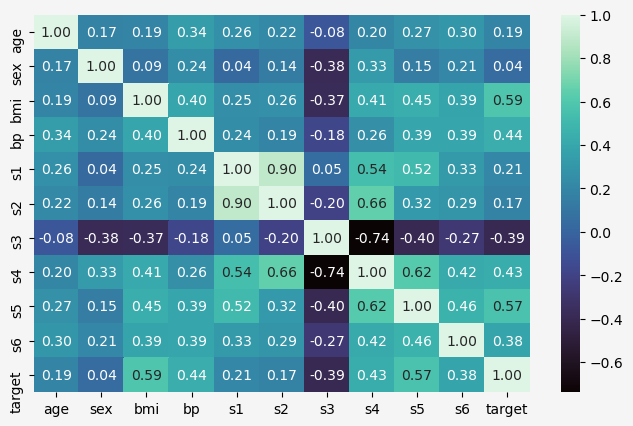

In [40]:
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data['data'],columns=diabetes_data['feature_names'])
y = pd.Series(diabetes_data['target'])
df = pd.concat([X,y],axis=1).rename({0:"target"},axis=1)

# obtain the corr matrix
corr_matrix = df.corr()

# visualize the correlation matrix
fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=100,facecolor="whitesmoke")
sns.heatmap(data=corr_matrix,annot=True,fmt=".2f",ax=ax,cmap="mako")
plt.show()

基于上图，我们可以发现s3和s4的相关系数高达-0.74。如果我们将相关系数阀值设置为0.7，则我们应该将S3或者s4中的一个从特征中移除。鉴于S4与目标变量的相关性更高，所以移除S3。

##### Chisquare Selection
___

**什么是Chi-square特征选择方法？**

Chi-square特征选择方法主要用于分类型变量的筛选。该方法计算每个分类变量与目标变量之间的卡方系数值，然后用该系数值选择一个理想的特征数量。如果想要使用该方法，应该满足以下几个条件：

- 特征应该是分类型变量
- 特征中每个类型的频率必需至少大于5
- 每个特征的数据都应该是独立抽样获得

**Chi-square具体如何选择特征？**

为了解释Chi-square如何选择特征，首先得明白卡方检验如何运作。卡放检验有两个用途：确认样本的代表性以及分类变量之间的独立性。在这里讲解第二个用法“分类变量之间的独立性”。

如果这两个变量没有任何的关系，则每一个cell value的观测值应该与我们的预期值没有显著的差异。所以卡方统计量被定义为：

$$\chi^2 = \sum_{l=1}^L\sum_{m=1}^M\frac{(o_{lm}-e_{lm})^2}{e_{lm}}$$

- L corresponds to the number of rows, M corresponds to the number of columns
- $o_{lm}$ represents the observed value in certain row and column
- $e_{lm}$ represents the expeced value

如果观测值和预期值越接近，则卡放值越小，说明两个分类变量之间不存在关系；相反，越大的卡方值越有可能说明两个分类变量之间存在关系。

**Example**

假设我们想要研究年级水平与素质重要性之间的关系，即是否高年级的同学与低年级的同学在素质发展上看法显著不同。可能高年级更加看重成绩，低年级更加看重Popular或者体育。具体数据如下：

In [108]:
df = pd.DataFrame({"Grades":[63,88,96],
                          "Popular":[31,55,55],
                          "Sports":[25,33,32]},
                         index=[4,5,6])
df = df.reset_index().rename(columns={"index":"Level"})
df_melted = pd.melt(df,id_vars="Level",value_vars=["Grades","Popular","Sports"],var_name="goal",value_name="score")
contingency_table = pd.pivot_table(df_melted,index="Level",columns="goal",values="score",aggfunc="sum",margins=True)
display(contingency_table)

goal,Grades,Popular,Sports,All
Level,,,,
4,63,31,25,119
5,88,55,33,176
6,96,55,32,183
All,247,141,90,478


为了进行卡方检验，我们首先要计算每个类型组合下的预期频数。以4年级与Grades交叉的单元格为例，我们来计算预期值：

首先，总共有478个学生，其中4年级总共占了大约25%(119/478)。其次，Grades这一列中总共有247个同学。**所以我们预期4年级里总共有** $\bf{247\times 119/478 = 61.49}$**，即61位同学。**同理，4年级里预期总共有$141\times 119/478 = 35$位同学。根据相同的逻辑，我们可以得到下方的预期频数表：

In [115]:
### from scipy.stats import chi2_contingency

df_ = df.set_index("Level")
chi2,p,dof,expected = chi2_contingency(df_)
expected_df = pd.DataFrame(expected,columns=df_.columns,index=[4,5,6])
display(expected_df)

,Grades,Popular,Sports
4,61.491632,35.102510,22.405858
5,90.945607,51.916318,33.138075
6,94.562762,53.981172,34.456067


解下来我们手动计算一遍卡方统计量，并且根据0.05显著性水平，判断是否应该拒绝原假设。

In [106]:
cols = contingency_table.columns.nunique()-1
rows = contingency_table.index.nunique()-1

total = contingency_table.loc['All','All']
chi_val = 0
for row in range(rows):
    for col in range(cols):
        e = contingency_table.iloc[row,cols]/total*contingency_table.iloc[rows,col]
        o = contingency_table.iloc[row,col]
        chi_val += (o-e)**2/e

        
# construct the chi2 distribution
from scipy.stats import chi2

alpha = 0.05
degree_freedom = (cols-1)*(rows-1)
pval = 1-chi2(degree_freedom).cdf(chi_val)
if pval < alpha:
    print("拒绝原假设：年级与目标之间有关系。")
else:
    print("接受原假设：年级与目标相互独立。")

print("Chi Square Value: %.3f" % chi_val)
print("P Value: %.3f" % pval)

接受原假设：年级与目标相互独立。
Chi Square Value: 1.312
P Value: 0.859


了解了卡方检验如何判断两份变量之间是否相关后，解释卡方检验如何帮助选择特征就很容易了。首先Chi-square Selection会计算每个分类变量与目标变量之间的卡方值。如果该分类变量与目标变量相关，则会得到一个很高的卡方值，并且差异显著。则我们可以选择该特征，否则排除掉该特征。

我们可以使用`SelectKBest`选择我们想要的特征数量。比如总共有10个分类型特征，`k=5`意味着我们只要5个特征。

In [128]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_wine

X,y = load_wine(return_X_y=True)
chi2_features = SelectKBest(chi2,k=3)
X_kbest_features = chi2_features.fit_transform(X,y)
print(X.shape)
print(X_kbest_features.shape)

(178, 13)
(178, 3)


##### Information Gain
___
信息增益衡量在转变数据后，信息熵的减少量。我们可以计算每个变量与目标量之间的信息增益。

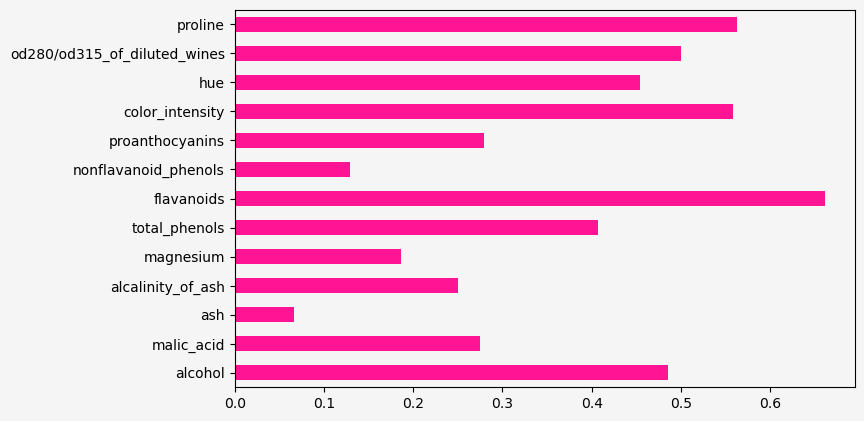

In [149]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif

X,y = load_wine(return_X_y=True)
feature_importances = mutual_info_classif(X,y)

fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=100,facecolor="whitesmoke")
pd.Series(feature_importances,index=load_wine()["feature_names"]).plot(kind="barh",ax=ax,color="deeppink")
ax.set_facecolor("whitesmoke")
plt.show()

基于上述特征重要性，我们可以初步筛选掉`ash`和`nonflavanoid_phenols`如果我们将阀值定为0.2。

#### Wrapper Method
___
Wrapper方法允许我们尝试特征的各种组合情况。因此，我们不会筛选掉单独对目标变量没有作用，但是合并起来可以构成一个非常有用的那些变量。另一方面，Wrapper方法的计算量很大。

常见的Wrapper Methods包括：

- Forward Stepwise Selection
- Backward Stepwise Selection
- Mix Selection

##### Forward Stepwise Selection
___
前向分布选择首先建立一个没有任何预测变量的模型，即直接取均值。随后，逐步地向模型里添加特征。每一次添加特征时，只添加那些能够让模型拟合度提升的特征，直到最终添加模型不再提升模型的拟合度。

前向分布选择的具体算法步骤如下：

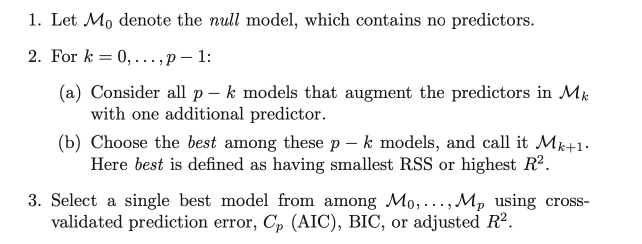

阐述一下该算法的步骤（假设有p个特征）：

- 第一步：建立一个不含任何预测变量的模型。
- 第二步：迭代所有特征，并且计算RSS或者$R^2$，选取RSS最小或者$R^2$最大的特征到模型内。这样我们建好了第一个模型。
- 第三步：在剩下的p-1个特征里在选择一个特征，尝试将新特征与已经选入模型的特征进行组合，并且计算RSS或者$R^2$，选取指标最优化的特征到模型内。这样建好了第二个模型。
- 第四步：不断重复上述步骤，直到添加变量到模型内不在提升相关指标。
- 第五步：此时我们已经建立了很多个模型，$M_0,\dots,M_p$。由于每个模型的特征数量不一样，所以我们使用AIC,BIC,或者Adjusted $R^2$来选择一个最好的模型。


$\color{crimson}{\text{前向分布的优势：即使样本量小于特征数量，即n<p，前向分布依然可以被用来进行特征选择。}}$

In [176]:
from sklearn.datasets import load_wine
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

X,y = load_wine(return_X_y=True)
wine_data = load_wine()
wine_data = pd.DataFrame(wine_data['data'],columns=wine_data["feature_names"])
knn = KNeighborsClassifier(n_neighbors=4)

sfs = SequentialFeatureSelector(knn,
                         k_features="best",
                         forward=True)
sfs.fit(X,y)
selected_features_index = list(map(int,sfs.k_feature_names_))
print("Selected Features:")
for i in wine_data.columns[selected_features_index].tolist():
    print(i,end="\n")

Selected Features:
alcohol
flavanoids
proanthocyanins
color_intensity


##### Backward Stepwise Selection
___
后向分布选择与前向分布完全相反，它首先构建一个包含所有预测变量的模型。然后，每次迭代都移除一个用处最小（对模型拟合度贡献最低）的特征，直到移除特征不再提升模型的拟合度。

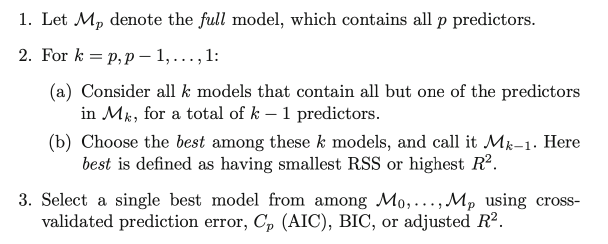

后向分布选择方法只有当样本量大于特征数量时，$n>p$，才可以被使用。同时，后向分布也是一个比较好的替代选择，当特征量很大无法实施*Best Subset Selection*。

In [177]:
from sklearn.datasets import load_wine
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

X,y = load_wine(return_X_y=True)
wine_data = load_wine()
wine_data = pd.DataFrame(wine_data['data'],columns=wine_data["feature_names"])
knn = KNeighborsClassifier(n_neighbors=4)

sfs = SequentialFeatureSelector(knn,
                         k_features="best",
                         forward=False) # 将参数改为False，变成后向
sfs.fit(X,y)
selected_features_index = list(map(int,sfs.k_feature_names_))
print("Selected Features:")
for i in wine_data.columns[selected_features_index].tolist():
    print(i,end="\n")

Selected Features:
alcohol
ash
alcalinity_of_ash
total_phenols
flavanoids
nonflavanoid_phenols
proanthocyanins
color_intensity
hue
od280/od315_of_diluted_wines


#### Embedded Method
___
Embedded特征选择是作为模型训练的一部分。某些模型内在就具备特征选择的功能。例如，决策树在每次划分样本的时候，总是选择一个最有用的（即划分样本后entropy或者gini降低最多）特征划分节点。另外一个例子是Lasso Regression。Lasso Regression在线性回归损失函数的基础上加上了L1正则项$\lambda \sum_{j=1}^p|\beta_j|$来惩罚加入的过多的特征。它会缩减无用特征的回归系数，甚至迫使他们等于0。因此，Lasso Regression往往会产生一个稀疏的模型。

**Comparison:**

- 对比Filtering，Embedded作为模型训练的一部分，考虑到了使用的具体的模型。
- 对比Wrapper，Embedded虽然不像其能够尝试所有的特征组合，但是计算量更小。

##### Lasso Regression
___
*Lasso regreesion*会加入L1正则项来限制模型的自由度，防止过度拟合。它的作用在上面已经提到。Lasso regression的损失函数被定义为：

$$\min_{\beta_0,\beta_1}{L(\beta_0,\beta_1)} = \min_{\beta_0,\beta_1}{\sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}) + \lambda \sum_{j=1}^p|\beta_j|}$$

- $\lambda \sum_{j=1}^p|\beta_j|$为L1正则项

接下来我们使用Lasso Regression对wine数据集进行特征选择。

In [192]:
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X,y = load_wine(return_X_y=True)
wine_data = load_wine()
wine_data = pd.DataFrame(wine_data['data'],columns=wine_data["feature_names"])
# build model with L1 penalty
lg_clf = LogisticRegression(penalty="l1",solver="liblinear",random_state=42,
                  max_iter=10000)
lg_model = lg_clf.fit(X,y)

selector = SelectFromModel(lg_model,prefit=True)
selected_features = selector.transform(X)

# print the selected features
print(wine_data.columns[selector.get_support()])

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'flavanoids', 'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


##### Random Forest
___
随机森林是bagging集成模型中的一个特殊方法。与BaggingClassifier不同，随机森领通过从p个特征中随机抽取m个特征划分数据，从而达到**Decorrelate**建造出的多个决策树的目的。对多个不相关的决策树进行聚合就可以减少variance。

随机森林自带`feature_importances`属性可以帮助我们测量每个特征的重要性：

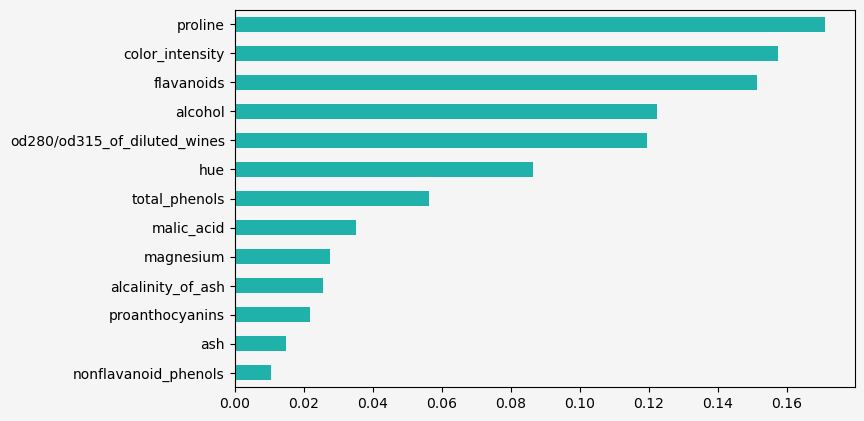

In [196]:
from sklearn.ensemble import RandomForestClassifier

X,y = load_wine(return_X_y=True)
wine_data = load_wine()
wine_data = pd.DataFrame(wine_data['data'],columns=wine_data["feature_names"])

rnd_clf = RandomForestClassifier(max_features="log2",n_estimators=300)
rnd_model = rnd_clf.fit(X,y)
ser = pd.Series(rnd_clf.feature_importances_,index=load_wine()["feature_names"]).sort_values(ascending=True)

# visualize the forest feature importances
fig,ax = plt.subplots(1,1,figsize=(8,5),dpi=100,facecolor="whitesmoke")
ser.plot(kind="barh",ax=ax,color="lightseagreen")
ax.set_facecolor("whitesmoke")
plt.show()